In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
file_path = "Data/Clean_data.xlsx"

male_df = pd.read_excel(file_path, sheet_name="Male")
female_df = pd.read_excel(file_path, sheet_name="Female")
time_df = pd.read_excel(file_path, sheet_name="Time")

male_df.head()

,STID,Q1_PartA,Q1_PartB,Q2_PartA,Q2_PartB,Q3,Q4_PartA,Q4_PartB,Q4_PartC
0,12001,5,3,1.0,3.0,1.0,0,0.0,2
1,12002,3,2,0.0,0.0,0.0,4,0.0,2
2,12003,1,0,2.0,7.0,0.0,4,1.5,1
3,12004,1,1,1.0,3.5,0.0,4,0.0,2
4,12005,4,4,1.5,4.0,0.0,1,1.0,1


In [4]:
questions = time_df["Question"].tolist()

male_avg = male_df[questions].mean()
female_avg = female_df[questions].mean()

analysis_df = pd.DataFrame({
    "Question": questions,
    "Male_AvgScore": male_avg.values,
    "Female_AvgScore": female_avg.values,
    "MaxPoints": time_df["MaxPoints"],
    "EstimatedTime": time_df["EstimatedTime"]
})

analysis_df["Male_ScoreRatio"] = analysis_df["Male_AvgScore"] / analysis_df["MaxPoints"]
analysis_df["Female_ScoreRatio"] = analysis_df["Female_AvgScore"] / analysis_df["MaxPoints"]

analysis_df

,Question,Male_AvgScore,Female_AvgScore,MaxPoints,EstimatedTime,Male_ScoreRatio,Female_ScoreRatio
0,Q1_PartA,2.611111,3.421053,6,25,0.435185,0.570175
1,Q1_PartB,1.333333,2.894737,4,15,0.333333,0.723684
2,Q2_PartA,1.444444,2.184211,3,10,0.481481,0.728070
3,Q2_PartB,3.666667,5.526316,7,30,0.523810,0.789474
4,Q3,0.250000,0.526316,1,5,0.250000,0.526316
5,Q4_PartA,2.222222,3.210526,5,20,0.444444,0.642105
6,Q4_PartB,0.416667,0.763158,2,8,0.208333,0.381579
7,Q4_PartC,1.222222,1.210526,2,7,0.611111,0.605263


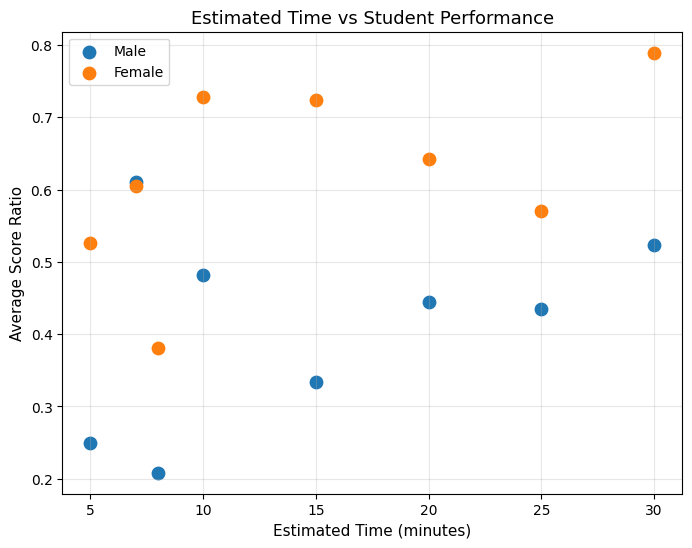

In [5]:
plt.figure(figsize=(8, 6))

plt.scatter(
    analysis_df["EstimatedTime"],
    analysis_df["Male_ScoreRatio"],
    s=80,
    label="Male"
)

plt.scatter(
    analysis_df["EstimatedTime"],
    analysis_df["Female_ScoreRatio"],
    s=80,
    label="Female"
)

plt.xlabel("Estimated Time (minutes)", fontsize=11)
plt.ylabel("Average Score Ratio", fontsize=11)
plt.title("Estimated Time vs Student Performance", fontsize=13)

plt.grid(alpha=0.3)
plt.legend()
plt.show()

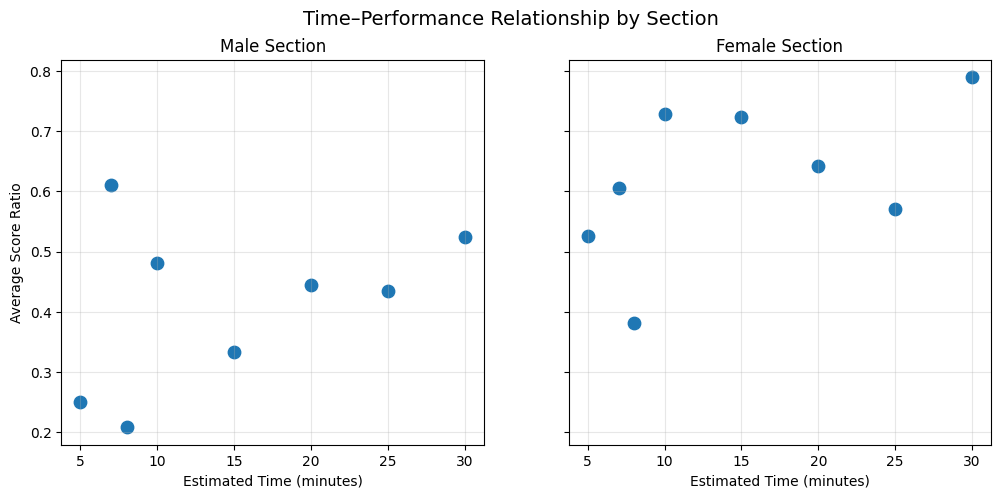

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Male
axes[0].scatter(
    analysis_df["EstimatedTime"],
    analysis_df["Male_ScoreRatio"],
    s=80
)
axes[0].set_title("Male Section")
axes[0].set_xlabel("Estimated Time (minutes)")
axes[0].set_ylabel("Average Score Ratio")
axes[0].grid(alpha=0.3)

# Female
axes[1].scatter(
    analysis_df["EstimatedTime"],
    analysis_df["Female_ScoreRatio"],
    s=80
)
axes[1].set_title("Female Section")
axes[1].set_xlabel("Estimated Time (minutes)")
axes[1].grid(alpha=0.3)

plt.suptitle("Time–Performance Relationship by Section", fontsize=14)
plt.show()


In [7]:
male_corr, male_p = pearsonr(
    analysis_df["EstimatedTime"],
    analysis_df["Male_ScoreRatio"]
)

female_corr, female_p = pearsonr(
    analysis_df["EstimatedTime"],
    analysis_df["Female_ScoreRatio"]
)

print(f"Male: r = {male_corr:.3f}, p-value = {male_p:.4f}")
print(f"Female: r = {female_corr:.3f}, p-value = {female_p:.4f}")

Male: r = 0.360, p-value = 0.3812
Female: r = 0.516, p-value = 0.1900
